In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import requests
import gmaps
import json
from pprint import pprint
import scipy.stats as st
from scipy.stats import linregress


# Resource File (CSV)
df497 = pd.read_csv("output_data/Top_497.csv")
df497.head()

,Unnamed: 0,Restaurant_id,Name,Locality,Address,City,Latitude,Longitude,Price Range,Average Cost for two,User Rating,Rating Text,Votes,all_reviews_count,Cuisines
0,0,15547004,Restaurant Hubert,CBD,"15 Bligh Street, CBD, Sydney",Sydney,-33.865348,151.210624,4,150,4.9,Excellent,589,224,"French, European"
1,1,16558798,Quay,Circular Quay,"Upper Level, Overseas Passenger Terminal 5 Hic...",Sydney,-33.858029,151.209970,4,500,4.9,Excellent,1366,454,Modern Australian
2,2,16559171,Tetsuya's,CBD,"529 Kent Street, CBD, Sydney",Sydney,-33.875143,151.204932,4,440,4.9,Excellent,1235,329,Japanese
3,3,16569454,LuMi Bar & Dining,Pyrmont,"56 Pirrama Road, \tPyrmont, Pyrmont, Sydney",Sydney,-33.867137,151.197517,4,190,4.9,Excellent,452,196,"Italian, Japanese"
4,4,15545439,Manpuku,Chatswood,"226 Victoria Avenue, Chatswood, Sydney",Sydney,-33.794417,151.189542,2,40,4.9,Excellent,486,190,"Japanese, Ramen"


# Summary Statistics for user rating and average cost for two

In [10]:
#Group df by City
group_all_cities = df497.groupby("City")
city_count = pd.DataFrame(group_all_cities["Restaurant_id"].count())

#Calculate the average user rating
user_average = pd.DataFrame(group_all_cities["User Rating"].mean())
city_count["User rating Average"] = user_average

#Calculate the median user rating
user_median = pd.DataFrame(group_all_cities["User Rating"].median())
city_count["User rating Median"] = user_median

#Calculate the standard deviation for user rating
user_var = pd.DataFrame(group_all_cities["User Rating"].var())
city_count["User rating Variance"] = user_var

#Calculate the standard deviation for user rating
user_stDev = pd.DataFrame(group_all_cities["User Rating"].std())
city_count["User rating Std Deviation"] = user_stDev

#Calculate the average user rating
Cost_average = pd.DataFrame(group_all_cities["Average Cost for two"].mean())
city_count["Average Cost"] = Cost_average

#Calculate the median user rating
Cost_median = pd.DataFrame(group_all_cities["Average Cost for two"].median())
city_count["Median Cost"] = Cost_median

#Calculate the standard deviation for user rating
Cost_var = pd.DataFrame(group_all_cities["Average Cost for two"].var())
city_count["Variance Cost"] = Cost_var

#Calculate the standard deviation for user rating
Cost_stDev = pd.DataFrame(group_all_cities["Average Cost for two"].std())
city_count["Std Deviation Cost"] = Cost_stDev

city_count.reset_index()


,City,Restaurant_id,User rating Average,User rating Median,User rating Variance,User rating Std Deviation,Average Cost,Median Cost,Variance Cost,Std Deviation Cost
0,Adelaide,98,4.394898,4.35,0.027293,0.165207,79.030612,75,2268.401115,47.627735
1,Brisbane,100,4.511000,4.50,0.013514,0.116250,72.730000,60,1799.330404,42.418515
2,Melbourne,100,4.668000,4.60,0.008461,0.091982,120.250000,90,10491.098485,102.426064
3,Perth,99,4.465657,4.40,0.021870,0.147884,82.090909,65,3145.634508,56.085956
4,Sydney,100,4.626000,4.60,0.013257,0.115137,98.050000,80,5989.340909,77.390832


In [11]:
#User rating average / Average cost /Median cost across all restaurants
User_rating = df497["User Rating"].mean()
Cost_average = df497["Average Cost for two"].mean()
Cost_median = df497["Average Cost for two"].median()

print(f" The average rating is {(User_rating)}")
print(f" The average cost is {Cost_average}")
print(f" The median cost is {Cost_median}")

 The average rating is 4.533802816901408
 The average cost is 90.49295774647888
 The median cost is 70.0


Melbourne and Sydney have a slightly higher user rating than the other cities. 
Regarding the average cost, Melbourne seems more expensive and its standard deviation for average cost  is really high compare to other cities.

#Bar charts for the average user rating and average cost for two

In [12]:
#Bar chart for the User rating
City = ["Adelaide", "Brisbane", "Melbourne", "Perth", "Sydney"]

#Set the axis and tick locations
x = City
y = city_count["User rating Average"]
tick_locations = [value for value in x]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6.4,4.2))
plt.bar(x, y, color='r', alpha=0.75, align="center")
plt.xticks(tick_locations, x, rotation="0")

# Set x and y limits
plt.xlim(-0.5, len(x)-0.5)
plt.ylim(4.2, max(y)+0.05)
# Set a Title and labels
plt.title("Average user rating per city")
plt.ylabel("User rating")
#Save image
plt.savefig("images/Average user rating per city.png")
# Save our graph and show the grap
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

City       User Rating
Adelaide   4.3            33
           4.4            20
           4.2            16
           4.5            13
           4.6             7
           4.7             5
           4.8             2
           4.9             2
Brisbane   4.4            36
           4.5            35
           4.6            17
           4.7             8
           4.8             2
           4.9             2
Melbourne  4.6            56
           4.7            27
           4.8            10
           4.9             7
Perth      4.4            37
           4.3            20
           4.5            20
           4.6            10
           4.7             6
           4.8             3
           4.9             3
Sydney     4.6            42
           4.5            27
           4.7            16
           4.8             8
           4.9             7
Name: User Rating, dtype: int64

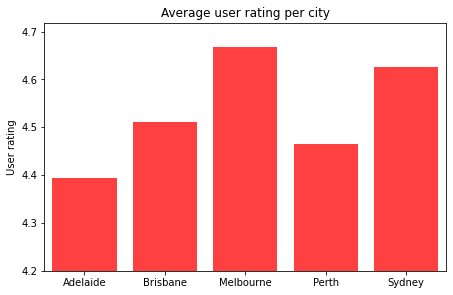

In [13]:
df2=df497.groupby(['City'])['User Rating'].value_counts()
df2

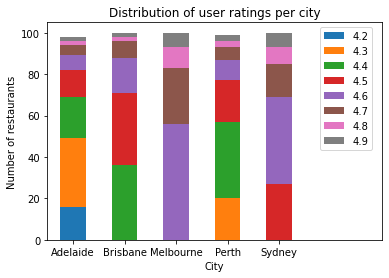

<Figure size 432x288 with 0 Axes>

In [14]:
#Breakdown of restaurants per user ratings across cities

df2=df497.groupby(['City'])['User Rating'].value_counts().unstack('User Rating').fillna(0)
df2.plot(kind='bar', stacked=True, legend=False, rot=0).legend(bbox_to_anchor=(0.8, 1))
# Set textual properties
plt.title("Distribution of user ratings per city")
plt.ylabel("Number of restaurants")
plt.xlim(-0.5,len(df2)+1)
plt.ylim(0,105)
#Save image
plt.savefig('images/Distribution of user ratings per city.png')
# Show plot
plt.show()
plt.tight_layout()

In [15]:
#Bar chart for the Average Cost
City = ["Adelaide", "Brisbane", "Melbourne", "Perth", "Sydney"]
#Set the axis and tick locations
x = City
y = city_count["Average Cost"]
tick_locations = [value for value in x]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6.4,4.2))
plt.bar(x, y, color='r', alpha=0.75, align="center")
plt.xticks(tick_locations, x, rotation="0")

# Set x and y limits
plt.xlim(-0.5, len(x)-0.5)
plt.ylim(0, max(y)+5)

# Set a Title and labels
plt.title("Average cost for two per city")
plt.ylabel("Average cost for two")

#Save image
plt.savefig('images/Average cost per city.png')

# Save our graph and show the grap
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

To understand better how the data is distributed we are going to do box plots for the average cost for two.

C:\Users\erica\anaconda3\envs\pythondata\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


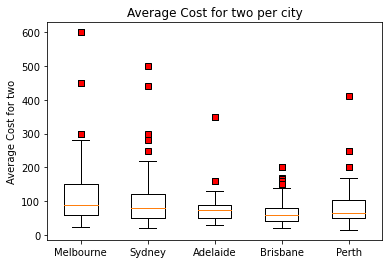

In [17]:
# Generate a box plot of the average cost for two across the five cities
Avg_Melbourne = df497.loc[df497["City"]=="Melbourne","Average Cost for two"]
Avg_Sydney = df497.loc[df497["City"]=="Sydney","Average Cost for two"]
Avg_Adelaide = df497.loc[df497["City"]=="Adelaide","Average Cost for two"]
Avg_Brisbane = df497.loc[df497["City"]=="Brisbane","Average Cost for two"]
Avg_Perth = df497.loc[df497["City"]=="Perth","Average Cost for two"]

all_cities_data = [Avg_Melbourne,Avg_Sydney, Avg_Adelaide,Avg_Brisbane,Avg_Perth]
all_cities = ["Melbourne", "Sydney", "Adelaide", "Brisbane", "Perth"]
red_square = dict(markerfacecolor='r', marker='s')

fig1, ax1 = plt.subplots()
ax1.set_title('Average Cost for two per city')
ax1.set_xticklabels(all_cities, rotation=0, fontsize=10)
ax1.set_ylabel('Average Cost for two')
ax1.boxplot(all_cities_data, flierprops=red_square)
#Save image 
plt.savefig('images/Outliers per city.png')
plt.show()

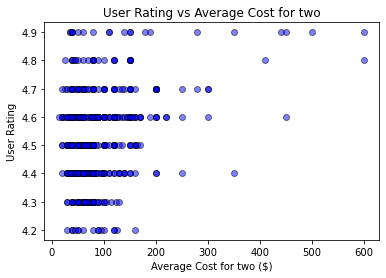

The correlation coefficient between User Rating and Average Cost for two is 0.29


In [18]:
#Scatter plot of the average cost two and average rating
#Scatter plot Average cost for two vs User Rating
x2 = df497["Average Cost for two"]
y2 = df497["User Rating"] 

plt.scatter(x2,y2, color='blue', edgecolor = 'black', alpha=0.5)
plt.xlabel('Average Cost for two ($)')
plt.ylabel('User Rating')
plt.title('User Rating vs Average Cost for two')
plt.savefig('images/User Rating vs. Average Cost for two.png')
plt.show()
print(f"The correlation coefficient between User Rating and Average Cost for two is {round(st.pearsonr(x2,y2)[0],2)}")

In [19]:
#Group df by City
group_all_cities = df497.groupby(["City"])
#Calculation of the average cost and user-rating per city
#Calculate the average cost for two per city
price_range = pd.DataFrame(group_all_cities["Price Range"].value_counts())
price_range.columns = ["Restaurant_Count"]
df = price_range.reset_index()
df

,City,Price Range,Restaurant_Count
0,Adelaide,3,53
1,Adelaide,2,28
2,Adelaide,4,17
3,Brisbane,2,39
4,Brisbane,3,36
5,Brisbane,4,22
6,Brisbane,1,3
7,Melbourne,4,48
8,Melbourne,3,35
9,Melbourne,2,15


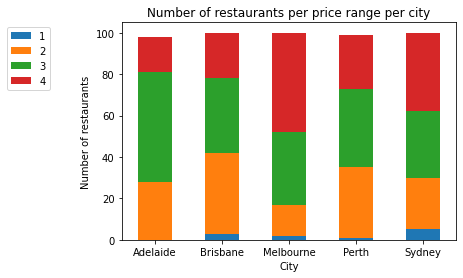

<Figure size 432x288 with 0 Axes>

In [20]:
#The number of restaurants per price range across cities.

df2=df497.groupby(['City'])['Price Range'].value_counts().unstack('Price Range').fillna(0)
df2.plot(kind='bar', stacked=True, legend=False, rot=0).legend(bbox_to_anchor=(-0.2, 1))
# Set textual properties
plt.title("Number of restaurants per price range per city")
plt.ylabel("Number of restaurants")
plt.xlim(-0.5,len(df2)-0.5)
plt.ylim(0,105)
#Save image
plt.savefig('images/Nb of restaurants per price range per city.png')
# Show plot
plt.show()
plt.tight_layout()